In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

## Load and explore data

### Subtask:
Load the Wine dataset, create a pandas DataFrame, and perform initial data exploration (shape, head, class distribution).


In [2]:
wine = load_wine()
df_wine = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df_wine['target'] = wine.target

print("Shape of the DataFrame:")
display(df_wine.shape)

print("\nFirst 5 rows of the DataFrame:")
display(df_wine.head())

print("\nClass distribution of the target variable:")
display(df_wine['target'].value_counts())

Shape of the DataFrame:


(178, 14)


First 5 rows of the DataFrame:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0



Class distribution of the target variable:


,count
target,
1,71
0,59
2,48


## Preprocess data

### Subtask:
Separate features and target, split data into training and testing sets, and scale the features using `StandardScaler`.


In [3]:
X = df_wine.drop('target', axis=1)
y = df_wine['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (142, 13)
Shape of X_test: (36, 13)
Shape of y_train: (142,)
Shape of y_test: (36,)


## Train random forest model

### Subtask:
Initialize and train the `RandomForestClassifier` on the training data.


In [4]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Evaluate model

### Subtask:
Predict on the test set and evaluate the model's performance using accuracy, classification report, and confusion matrix.


Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



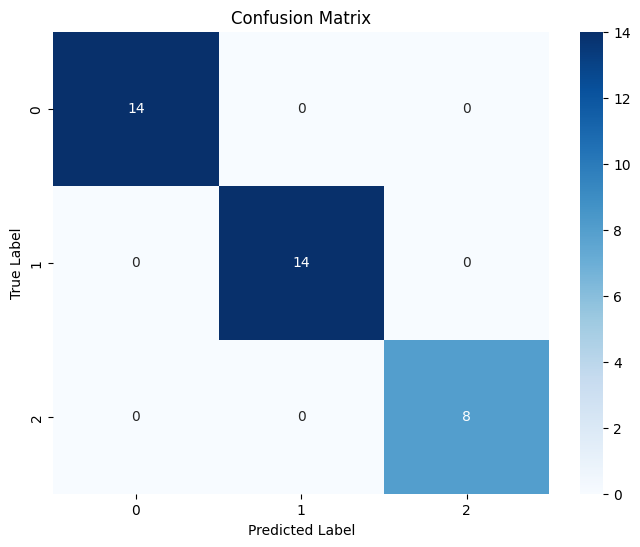

In [5]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Visualize with pca (optional)

### Subtask:
Apply PCA to reduce dimensionality and visualize the data in 2D, colored by actual and predicted classes.


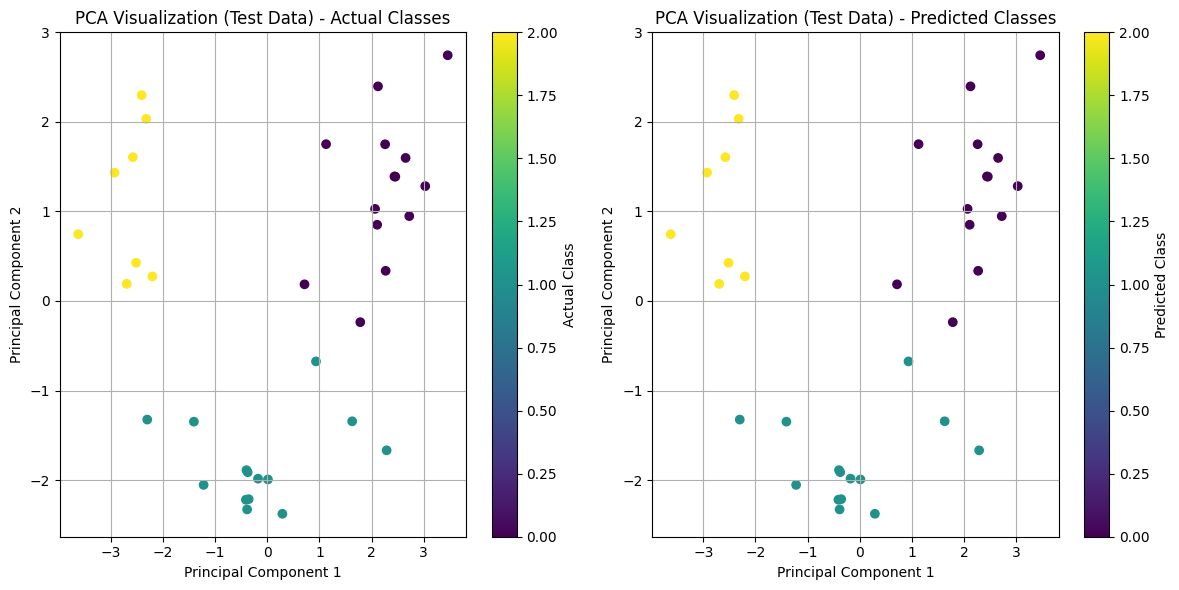

In [6]:
# Initialize PCA
pca = PCA(n_components=2, random_state=42)

# Fit PCA on scaled training data and transform training and testing data
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Plot PCA visualization colored by actual classes
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
scatter1 = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis')
plt.title('PCA Visualization (Test Data) - Actual Classes')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter1, label='Actual Class')
plt.grid(True)

# Plot PCA visualization colored by predicted classes
plt.subplot(1, 2, 2)
scatter2 = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, cmap='viridis')
plt.title('PCA Visualization (Test Data) - Predicted Classes')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter2, label='Predicted Class')
plt.grid(True)

plt.tight_layout()
plt.show()

## Hyperparameter tuning (optional)

### Subtask:
Experiment with different hyperparameters for the Random Forest model to potentially improve performance.


In [7]:
# parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

#  GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5, # Using 5-fold cross-validation
                           n_jobs=-1) # Use all available cores

# Fit GridSearchCV to the scaled training data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)

Best parameters found by GridSearchCV:
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


**Reasoning**:
Train a new RandomForestClassifier using the best parameters found by GridSearchCV and evaluate its performance on the test set.




Accuracy with best parameters: 1.0000

Classification Report with best parameters:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



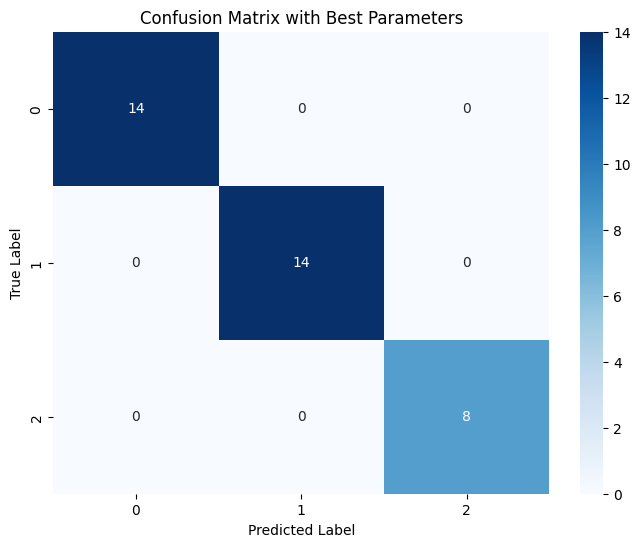

In [8]:
# Train a new model with the best parameters
best_model = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'],
                                   max_depth=grid_search.best_params_['max_depth'],
                                   min_samples_split=grid_search.best_params_['min_samples_split'],
                                   random_state=42)

best_model.fit(X_train, y_train)

# Evaluate the performance of the best model on the test set
y_pred_best = best_model.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"\nAccuracy with best parameters: {accuracy_best:.4f}")

print("\nClassification Report with best parameters:")
print(classification_report(y_test, y_pred_best))

conf_matrix_best = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix with Best Parameters')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Summary:

### Data Analysis Key Findings

*   The Wine dataset was successfully loaded and explored, revealing a shape of (178, 14) and a class distribution of 71 instances for class 1, 59 for class 0, and 48 for class 2.
*   The data was successfully preprocessed by separating features and target, splitting into training (142 samples) and testing (36 samples) sets, and scaling the features.
*   A Random Forest Classifier was trained on the scaled training data.
*   The initial Random Forest model achieved perfect accuracy (1.0000) on the test set, with perfect precision, recall, and F1-score (1.00) for all classes.
*   PCA was successfully applied to reduce the dimensionality to 2 components for visualization.
*   Hyperparameter tuning using `GridSearchCV` identified `{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}` as the best parameters.
*   Training and evaluating a Random Forest model with the best parameters also resulted in perfect accuracy (1.0000) on the test set.

### Insights or Next Steps

*   The Wine dataset appears to be highly separable, as evidenced by the perfect classification performance of the default Random Forest model on the test set.
*   While hyperparameter tuning confirmed perfect performance, it might be beneficial to test the model on a different split or a larger dataset if available to ensure robustness.
